# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

import json
from pprint import pprint

import logging

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))


636


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
count = 1
for c in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={c}&appid={weather_api_key}&units=imperial"
    response = requests.get(url).json() 
    try:
        print(f"Processing city #{count}: {response['name']}")
        CityList.append([response["name"],response["coord"]["lat"],response["coord"]["lon"],response["main"]["temp_max"],response["main"]["humidity"],response["clouds"]["all"],response["wind"]["speed"],response["sys"]["country"],response["dt"]])
    except:
        print(f"Skipping city #{count}: {c}")
    count += 1
    time.sleep(0.5)

Processing city #1: Ginda
Processing city #2: Great Falls
Processing city #3: Wahpeton
Processing city #4: Codrington
Processing city #5: Mīzan Teferī
Processing city #6: Conde
Processing city #7: Castro
Processing city #8: Pisco
Processing city #9: Ancud
Processing city #10: Atuona
Skipping city #11: nizhneyansk
Processing city #12: New Norfolk
Processing city #13: Clyde River
Skipping city #14: barbar
Processing city #15: Tasiilaq
Processing city #16: Shelburne
Processing city #17: Cape Town
Processing city #18: Ushuaia
Processing city #19: Kalmar
Processing city #20: Otradnoye
Processing city #21: Hamilton
Processing city #22: Sitka
Processing city #23: Hobyo
Processing city #24: Rikitea
Processing city #25: Fort Nelson
Processing city #26: Kapaa
Processing city #27: Bouna
Processing city #28: Faanui
Processing city #29: Oodweyne
Processing city #30: Panguna
Processing city #31: Taizhou
Processing city #32: Pangody
Processing city #33: Fortuna
Processing city #34: São Filipe
Process

Skipping city #266: labutta
Processing city #267: Novikovo
Processing city #268: Eyl
Processing city #269: Tarija
Processing city #270: Pacific Grove
Processing city #271: Ust-Nera
Processing city #272: Tupik
Skipping city #273: rawannawi
Processing city #274: Malakal
Processing city #275: Verkhoyansk
Processing city #276: Kūhdasht
Processing city #277: Murray Bridge
Processing city #278: Cabo San Lucas
Processing city #279: Hereford
Processing city #280: Inírida
Processing city #281: Sussex
Processing city #282: Khatanga
Processing city #283: Alihe
Processing city #284: Kruisfontein
Processing city #285: Kulevcha
Processing city #286: Mumford
Processing city #287: Alta Floresta
Processing city #288: Mana
Processing city #289: Belmonte
Processing city #290: Alofi
Processing city #291: Tucumã
Processing city #292: Bambanglipuro
Processing city #293: Bambous Virieux
Processing city #294: Pangnirtung
Processing city #295: Sydney
Processing city #296: Laguna
Processing city #297: Khovd
Pro

Processing city #526: Dhidhdhoo
Skipping city #527: ruatoria
Processing city #528: Rio Grande
Processing city #529: Tigil'
Processing city #530: Liverpool
Skipping city #531: dinsor
Processing city #532: Merauke
Processing city #533: Hanzhong
Processing city #534: Altamira
Processing city #535: Pemba
Processing city #536: Kot Kapūra
Processing city #537: Vila do Maio
Processing city #538: Vostok
Processing city #539: Nouadhibou
Processing city #540: Onega
Processing city #541: Bagdarin
Processing city #542: Jinchang
Processing city #543: Pereira Barreto
Skipping city #544: solovetskiy
Processing city #545: Buala
Processing city #546: Yamoussoukro
Processing city #547: Chimoio
Processing city #548: Kungurtug
Processing city #549: Port Macquarie
Processing city #550: Saint Anthony
Processing city #551: Marsh Harbour
Processing city #552: Ekhabi
Processing city #553: Atherton
Processing city #554: Chissamba
Processing city #555: Talnakh
Processing city #556: Ambon City
Processing city #55

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [21]:
CityDF =  pd.DataFrame(CityList,columns = ["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed","Country","Date"])
CityDF.to_csv("CityOutput.csv")
CityDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ginda,30.6945,78.4932,49.69,57,98,4.21,IN,1635037541
1,Great Falls,47.5002,-111.3008,49.41,45,1,8.01,US,1635037569
2,Wahpeton,46.2652,-96.6059,43.61,75,40,8.05,US,1635037685
3,Codrington,-38.2667,141.9667,53.08,63,100,15.28,AU,1635037661
4,Mīzan Teferī,6.9833,35.5833,61.72,69,1,3.11,ET,1635037687


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [22]:
CityDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,587.000000,587.000000,587.000000,587.000000,587.000000,587.000000,5.870000e+02
mean,19.277444,16.995701,59.460136,72.304940,57.587734,7.585094,1.635038e+09
std,33.384088,90.703560,20.029988,19.238951,40.501933,5.411893,1.476497e+02
min,-54.800000,-175.200000,-6.090000,12.000000,0.000000,0.000000,1.635037e+09
25%,-8.969400,-65.255300,46.570000,63.000000,11.500000,3.220000,1.635038e+09
50%,22.890900,21.050000,62.820000,76.000000,75.000000,6.380000,1.635038e+09
75%,48.009750,97.673150,76.170000,87.000000,99.000000,11.040000,1.635038e+09
max,78.218600,179.316700,95.050000,100.000000,100.000000,32.500000,1.635038e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
# No cities > 100% Humidity

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [23]:
clean_city_data = CityDF
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ginda,30.6945,78.4932,49.69,57,98,4.21,IN,1635037541
1,Great Falls,47.5002,-111.3008,49.41,45,1,8.01,US,1635037569
2,Wahpeton,46.2652,-96.6059,43.61,75,40,8.05,US,1635037685
3,Codrington,-38.2667,141.9667,53.08,63,100,15.28,AU,1635037661
4,Mīzan Teferī,6.9833,35.5833,61.72,69,1,3.11,ET,1635037687


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

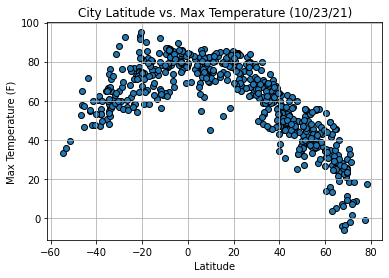

In [64]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Max Temp"],edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Max Temperature (10/23/21)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.savefig("LatTemp.png")
plt.show()
# Higher temps near equator as expected

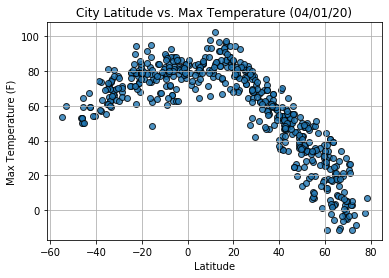

## Latitude vs. Humidity Plot

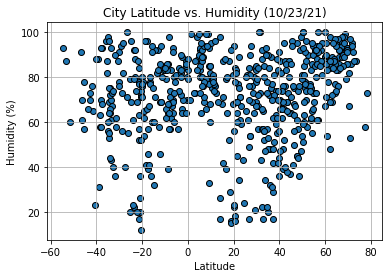

In [65]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Humidity"],edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Humidity (10/23/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.savefig("LatHumid.png")
plt.show()
# Humidity is mostly more than 50% across all latitudes

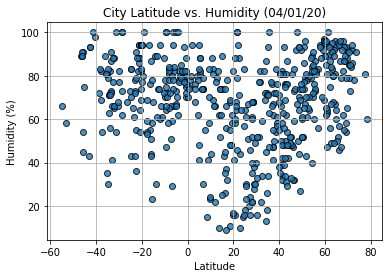

## Latitude vs. Cloudiness Plot

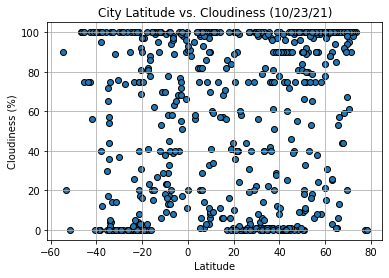

In [66]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Cloudiness"],edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Cloudiness (10/23/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.savefig("LatCloud.png")
plt.show()
# There is a broad range of cloudiness from 0 to 100% across all latitudes

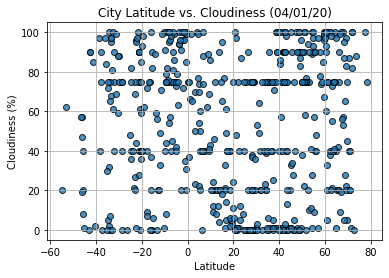

## Latitude vs. Wind Speed Plot

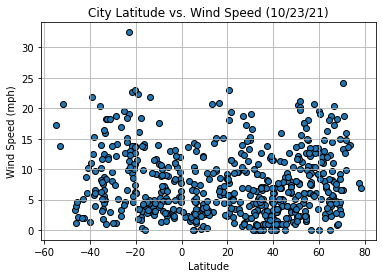

In [67]:
plt.scatter(clean_city_data["Lat"],clean_city_data["Wind Speed"],edgecolors="black")
plt.grid()
plt.title("City Latitude vs. Wind Speed (10/23/21)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.savefig("LatWind.png")
plt.show()
# Wind speed is generally less than 25 mph across all latitudes

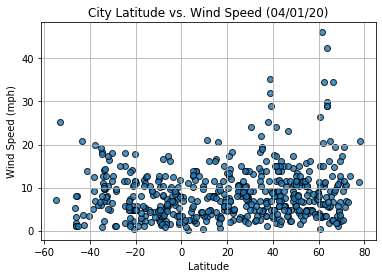

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8865171471919684


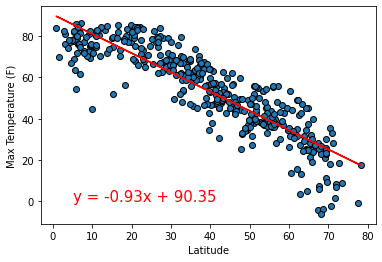

In [43]:
north = clean_city_data.loc[clean_city_data["Lat"] >= 0]
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Lat"],north["Max Temp"])
regress_values = north["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(north["Lat"],north["Max Temp"],edgecolors="black")
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(5,0),fontsize = 15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is a strong negative correlation between temperatures and latitudes in the Northern hemisphere.

The r-value is: 0.46937863826630627


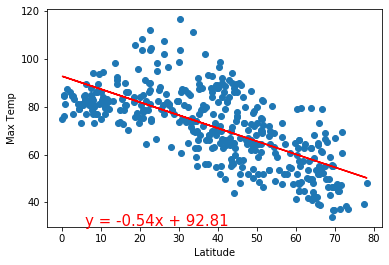

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7182153779295953


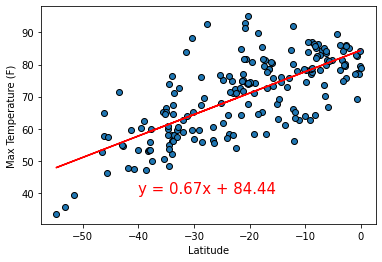

In [45]:
south = clean_city_data.loc[clean_city_data["Lat"] < 0]
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Lat"],south["Max Temp"])
regress_values = south["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(south["Lat"],south["Max Temp"],edgecolors="black")
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize = 15,color="red")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is a strong positive correlation between temperatures and latitudes in the Southern hemisphere.

The r-value is: 0.6082708688906918


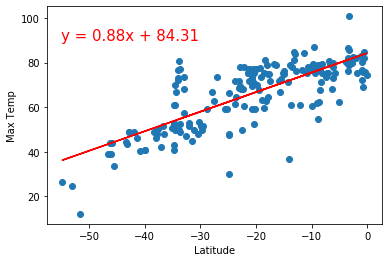

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.18876734384957738


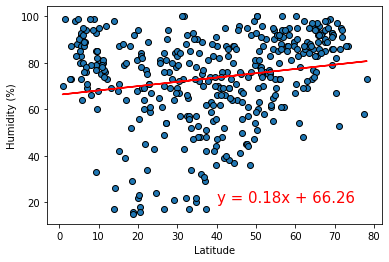

In [49]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Lat"],north["Humidity"])
regress_values = north["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(north["Lat"],north["Humidity"],edgecolors="black")
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize = 15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is little correlation between humidity and latitude in the Northern hemisphere.

The r-value is: 0.000543987878808455


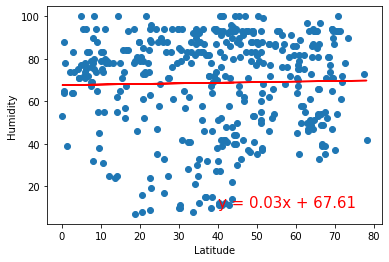

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09725418229068789


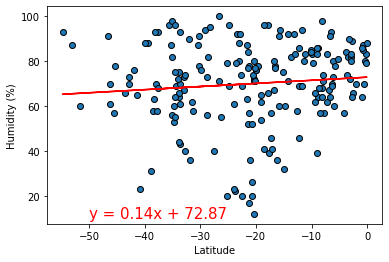

In [51]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Lat"],south["Humidity"])
regress_values = south["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(south["Lat"],south["Humidity"],edgecolors="black")
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize = 15,color="red")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is little correlation between humidity and latitude in the Southern hemisphere.

The r-value is: 0.014985174297345524


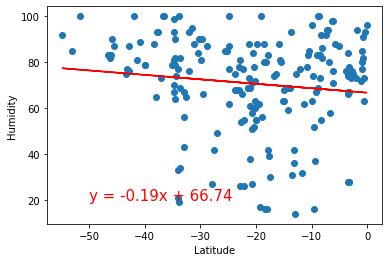

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1790968259752615


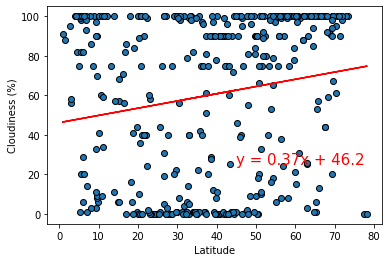

In [54]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Lat"],north["Cloudiness"])
regress_values = north["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(north["Lat"],north["Cloudiness"],edgecolors="black")
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(45,25),fontsize = 15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is little correlation between cloudiness and latitude in the Northern hemisphere.

The r-value is: 0.0020898727664228514


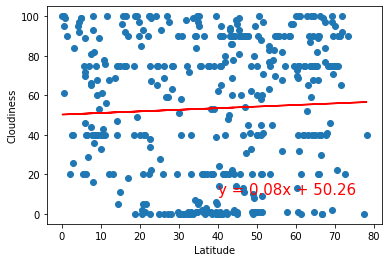

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.09158025266765948


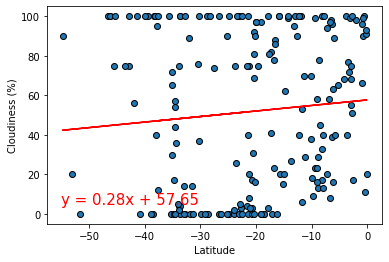

In [56]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Lat"],south["Cloudiness"])
regress_values = south["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(south["Lat"],south["Cloudiness"],edgecolors="black")
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize = 15,color="red")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is little correlation between cloudiness and latitude in the Southern hemisphere.

The r-value is: 0.0035263772085582894


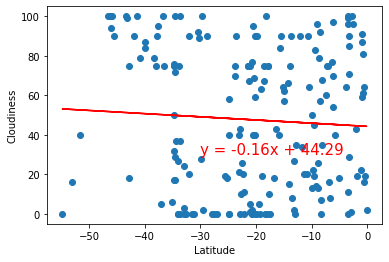

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.21880513425743878


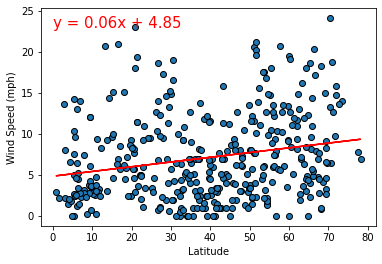

In [59]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(north["Lat"],north["Wind Speed"])
regress_values = north["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(north["Lat"],north["Wind Speed"],edgecolors="black")
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,23),fontsize = 15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is little correlation between wind speed and latitude in the Northern hemisphere.

The r-value is: 0.04019723576144484


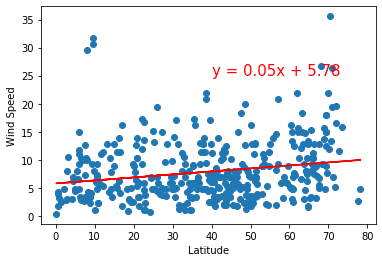

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.14556986935939462


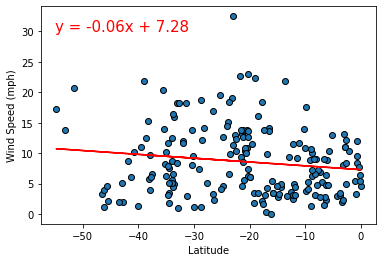

In [61]:
(slope,intercept,rvalue,pvalue,stderr)=linregress(south["Lat"],south["Wind Speed"])
regress_values = south["Lat"]*slope + intercept
line_eq = f"y = {round(slope,2)}x + {round(intercept,2)}"
plt.scatter(south["Lat"],south["Wind Speed"],edgecolors="black")
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize = 15,color="red")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
print(f"The r-value is: {rvalue}")
plt.show()
# There is little correlation between wind speed and latitude in the Southern hemisphere.

The r-value is: 0.017128274759839232


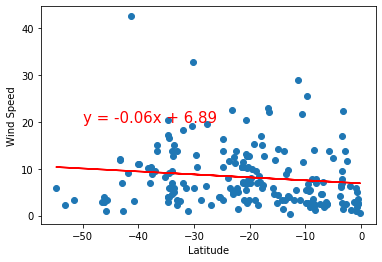